In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
import numpy as np

In [3]:
final_df = pd.read_csv("data/final_df.csv")

In [4]:
crime = pd.read_csv("data/crime.csv")

C:\Users\zacha\AppData\Local\Temp\ipykernel_24940\2056651422.py:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  crime = pd.read_csv("data/crime.csv")


In [5]:
final_df

,indicator_id,region_id,date,value,city,state,city_state,indicator,category,total_incidents
0,ZATT,52334,2014-01-31,173491.0,Greenwood,SC,"Greenwood, SC",ZHVI All Homes- Top Tier Time Series ($),Home values,150
1,ZATT,52334,2014-02-28,174812.0,Greenwood,SC,"Greenwood, SC",ZHVI All Homes- Top Tier Time Series ($),Home values,150
2,ZATT,52334,2014-03-31,177605.0,Greenwood,SC,"Greenwood, SC",ZHVI All Homes- Top Tier Time Series ($),Home values,150
3,ZATT,52334,2014-04-30,178458.0,Greenwood,SC,"Greenwood, SC",ZHVI All Homes- Top Tier Time Series ($),Home values,150
4,ZATT,52334,2014-05-31,178872.0,Greenwood,SC,"Greenwood, SC",ZHVI All Homes- Top Tier Time Series ($),Home values,150
...,...,...,...,...,...,...,...,...,...,...
284551,Z4BR,92159,2014-08-31,83411.0,Victoria,TX,"Victoria, TX",ZHVI 4-Bedroom Time Series ($),Home values,190
284552,Z4BR,92159,2014-09-30,83676.0,Victoria,TX,"Victoria, TX",ZHVI 4-Bedroom Time Series ($),Home values,190
284553,Z4BR,92159,2014-10-31,84146.0,Victoria,TX,"Victoria, TX",ZHVI 4-Bedroom Time Series ($),Home values,190
284554,Z4BR,92159,2014-11-30,84545.0,Victoria,TX,"Victoria, TX",ZHVI 4-Bedroom Time Series ($),Home values,190


In [6]:
city_state = final_df[["city_state","value","total_incidents"]].groupby("city_state").agg("mean").reset_index()

In [7]:
city_state_25 = city_state.nlargest(25, "total_incidents")
city_state_bot_25 = city_state.nsmallest(25, "total_incidents")

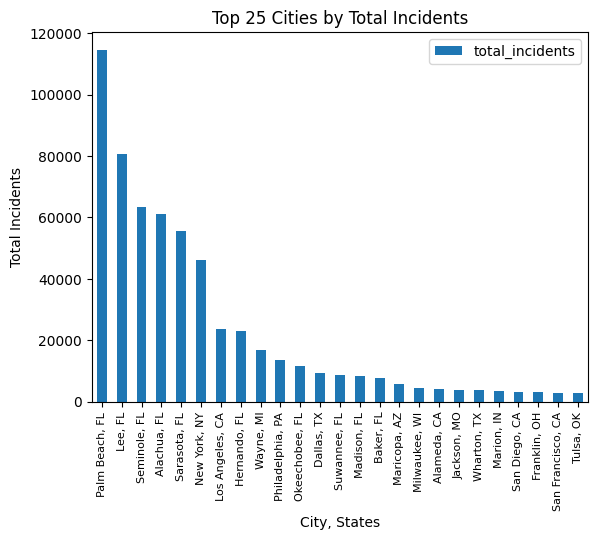

In [8]:
ax = city_state_25.plot(kind='bar', x='city_state', y='total_incidents')
plt.title('Top 25 Cities by Total Incidents')
plt.xlabel('City, States')
plt.ylabel('Total Incidents')
ax.tick_params(axis='x', labelsize=8)
plt.show()

In [9]:
city_state

,city_state,value,total_incidents
0,"Abbeville, SC",114940.932462,49.0
1,"Adair, IA",99129.192583,2.0
2,"Adair, OK",128714.437004,52.0
3,"Adams, NE",174836.911762,16.0
4,"Adams, WI",80529.794338,15.0
...,...,...,...
881,"York, PA",125759.670236,303.0
882,"York, SC",176969.457233,262.0
883,"Yuma, AZ",144997.564933,171.0
884,"Yuma, CO",126575.738057,4.0


Text(0.5, 1.0, 'Total_Incidents Box Plot')

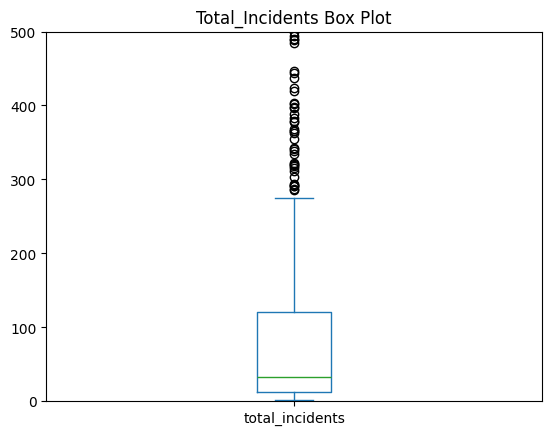

In [10]:
city_state["total_incidents"].plot(kind="box")
plt.ylim(0, 500)
plt.title("Total_Incidents Box Plot")

In [14]:
df_train, df_test = train_test_split(final_df, train_size = .80, random_state = 477)

In [22]:
final_df.sort_values(by="city_state", ascending=True).head(1)

,indicator_id,region_id,date,value,city,state,city_state,indicator,category,total_incidents
211093,ZSFH,70603,2014-12-31,92257.974608,Abbeville,SC,"Abbeville, SC",ZHVI Single-Family Homes Time Series ($),Home values,49


In [23]:
final_df.sort_values(by="indicator", ascending=True).head(1)

,indicator_id,region_id,date,value,city,state,city_state,indicator,category,total_incidents
187649,Z1BR,93986,2014-09-30,147174.0,Sheridan,WY,"Sheridan, WY",ZHVI 1-Bedroom Time Series ($),Home values,22


In [32]:
# reference for city_state is Abbeville, SC
# reference for indicator is ZHVI 1-Bedroom Time Series ($)
reg_model = smf.ols("value ~ city_state + indicator", data = df_train).fit()
reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.366
Model:                            OLS   Adj. R-squared:                  0.363
Method:                 Least Squares   F-statistic:                     145.9
Date:                Fri, 05 Dec 2025   Prob (F-statistic):               0.00
Time:                        14:27:21   Log-Likelihood:            -3.2083e+06
No. Observations:              227644   AIC:                         6.418e+06
Df Residuals:                  226747   BIC:                         6.428e+06
Df Model:                         896                                         
Covariance Type:            nonrobust                                         
=================================================================================================================================================================
                                                                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                                     -3.019e+04   2.71e+04     -1.116      0.264   -8.32e+04    2.28e+04
city_state[T.Adair, IA]                                                                       -2.316e+04   3.84e+04     -0.603      0.546   -9.84e+04    5.21e+04
city_state[T.Adair, OK]                                                                        3.099e+04   3.73e+04      0.832      0.405    -4.2e+04    1.04e+05
city_state[T.Adams, NE]                                                                        7.916e+04   3.65e+04      2.168      0.030    7593.146    1.51e+05
city_state[T.Adams, WI]                                                                       -1.382e+04   3.52e+04     -0.392      0.695   -8.29e+04    5.52e+04
city_state[T.Addison, VT]                                                                      1.854e+05    4.5e+04      4.121      0.000    9.72e+04    2.74e+05
city_state[T.Aiken, SC]                                                                        6.283e+04   3.26e+04      1.926      0.054   -1102.026    1.27e+05
city_state[T.Aitkin, MN]                                                                      -2453.7560   4.54e+04     -0.054      0.957   -9.14e+04    8.65e+04
city_state[T.Alachua, FL]                                                                       7.42e+04   3.61e+04      2.056      0.040    3460.694    1.45e+05
city_state[T.Alameda, CA]                                                                      5.442e+05   3.34e+04     16.296      0.000    4.79e+05     6.1e+05
city_state[T.Alamosa, CO]                                                                       6.07e+04   3.61e+04      1.682      0.093      -1e+04    1.31e+05
city_state[T.Albany, NY]                                                                       7.447e+04   2.97e+04      2.511      0.012    1.63e+04    1.33e+05
city_state[T.Alexander, IL]                                                                   -1.688e+04   4.16e+04     -0.406      0.685   -9.84e+04    6.47e+04
city_state[T.Alexander, NC]                                                                    1.244e+05   3.75e+04      3.319      0.001    5.09e+04    1.98e+05
city_state[T.Alexandria, VA]                                                                   4.043e+05   2.94e+04     13.769      0.000    3.47e+05    4.62e+05
city_state[T.Alger, MI]                                                                       -2.227e+04   3.76e+04     -0.592      0.554    -9.6e+04    5.14e+04
city_

In [29]:
top_coefficients = reg_model.params.drop('Intercept').sort_values(ascending=False)
top_coefficients.head(15)

city_state[T.Nantucket, MA]          1.197445e+06
city_state[T.San Francisco, CA]      1.091293e+06
city_state[T.Palm Beach, FL]         9.113827e+05
city_state[T.San Mateo, CA]          8.054100e+05
city_state[T.Santa Barbara, CA]      8.012270e+05
city_state[T.Santa Cruz, CA]         5.846874e+05
city_state[T.Mendocino, CA]          5.716556e+05
city_state[T.Honolulu, HI]           5.598873e+05
city_state[T.Santa Clara, CA]        5.480311e+05
city_state[T.Monterey, CA]           5.436923e+05
city_state[T.Sonoma, CA]             5.292447e+05
city_state[T.Arlington, VA]          5.244479e+05
city_state[T.Alameda, CA]            5.081245e+05
city_state[T.Fairfield, CT]          4.787316e+05
city_state[T.San Luis Obispo, CA]    4.586331e+05
dtype: float64

In [30]:
bot_coefficients = reg_model.params.drop('Intercept').sort_values(ascending=True)
bot_coefficients.head(15)

city_state[T.Lee, FL]                                                                           -715264.863193
city_state[T.Alachua, FL]                                                                       -483871.634244
city_state[T.Seminole, FL]                                                                      -470282.459157
indicator[T.ZORI (Smoothed): All Homes Plus Multifamily Time Series ($)]                        -313781.784162
indicator[T.ZORI (Smoothed, Seasonally Adjusted): All Homes Plus Multifamily Time Series ($)]   -310533.476703
city_state[T.Sarasota, FL]                                                                      -280370.442646
city_state[T.Wayne, MI]                                                                         -165431.068569
city_state[T.Jackson, KY]                                                                       -153891.441935
city_state[T.Hernando, FL]                                                                      -133842.092448
c